### Importing Libraries

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
from matplotlib import cm
import skimage
from matplotlib import cm
from skimage.color import rgb2gray
from skimage.color import gray2rgb
from skimage.io import imread, imshow, imsave
from skimage.filters import prewitt_h,prewitt_v
%matplotlib inline

### Reading the Input Image

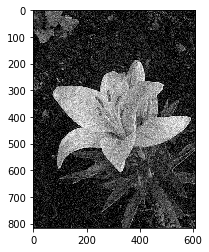

(816, 609, 3)


In [38]:
image = cv2.imread('C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/ImageDenoising/Noisy/Flower.png')
plt.imshow(image)
plt.show()
print(image.shape)

### Extracting low frequency components (Blurring)

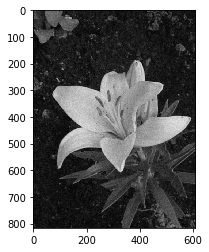

(816, 609, 3)


In [39]:
img_1 = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(img_1)
plt.show()
cv2.imwrite('FG_1.jpg', img_1)
print(img_1.shape)

### Extracting high frequency components (Embossing)

(816, 609)
(816, 609)


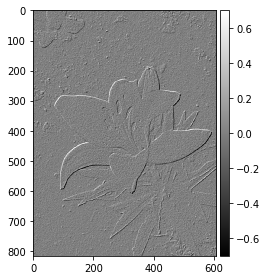

In [48]:
from skimage.io import imsave
#reading the image 
image = imread('FG_1.jpg',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)

#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

z=edges_prewitt_vertical
y=edges_prewitt_horizontal

#Printing the dimensions of the horizontal and vertical components
print(z.shape)
print(y.shape)

#Displaying the horizontal and vertical components
imshow(z+y, cmap='gray')

#Saving the embossed image
imsave('Embossed.jpg', (z+y))

### Combining high and low frequency components to denoise the image 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


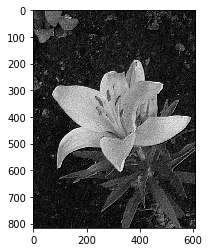

True

In [50]:
import matplotlib.pyplot as plt

# The Blurred Image
x=cv2.imread('FG_1.jpg')

#Converting the blurred image to grayscale
x=rgb2gray(x)

#Converting the denoised image from grayscale to its original colors
w=gray2rgb(z+y+x)

#Displaying the denoised image
plt.imshow(w)
plt.show()

#Saving the image
cv2.imwrite('FlowerDenoised.jpg', w)

### Comparison with Bilateral Filtering 

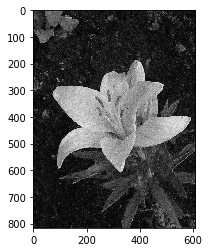

True

In [51]:
import cv2 
  
# Read the noisy image. 
img = cv2.imread('C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/ImageDenoising/Noisy/Flower.png') 
  
# Apply bilateral filter with d = 15,  
# sigmaColor = sigmaSpace = 75. 
bilateral = cv2.bilateralFilter(img, 15, 75, 75) 

#Display the denoised image
plt.imshow(bilateral)
plt.show()

# Save the output. 
cv2.imwrite('Bilateral.jpg', bilateral)